problem statement:
 
You may have some experience of travelling to and from the airport. Have you ever used Uber or any other cab service for this travel? Did you at any time face the problem of cancellation by the driver or non-availability of cars?

Well, if these are the problems faced by customers, these very issues also impact the business of Uber. If drivers cancel the request of riders or if cars are unavailable, Uber loses out on its revenue.

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars to and from the airport) and recommend ways to improve the situation. As a result of the analysis, we should be able to present to the client the root cause(s) and possible hypotheses of the problem(s) and recommend ways to improve them

Importing library's

In [261]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Exploratory Data Analysis on Uber Request data

Task 1: data cleaning

In [262]:
#importing data of uber 
data  = pd.read_csv(r"D:\VS Code\Machine Learning\Projects\Uber data analysis\Uber Request Data.csv",encoding = "ISO-8859-1")
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [263]:
#converting data and time as date and time format
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'])
data['Drop timestamp'] = pd.to_datetime(data['Drop timestamp'])
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [264]:
# removing unnecessary column like we don't need the driver id and all
data = data.drop(['Driver id'], axis = 1)
data.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT
6744,6753,Airport,No Cars Available,2016-07-15 23:55:03,NaT


In [265]:
#How many unique pickup points are present in uberReq?
print(data['Pickup point'].unique())

['Airport' 'City']


In [266]:
data.shape

(6745, 5)

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request timestamp  6745 non-null   datetime64[ns]
 4   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [268]:
data['Pickup point'].unique()

array(['Airport', 'City'], dtype=object)

In [269]:
data.isnull().sum(axis = 0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [270]:
data[(data['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

In [271]:
len(data['Request id'].unique())

6745

In [272]:
len(data['Pickup point'].unique())

2

In [273]:
len(data['Status'].unique())

3

In [274]:
#checking for any duplicates:
len(data[data.duplicated()].index)

0

Univariate analysis

<AxesSubplot: xlabel='Status'>

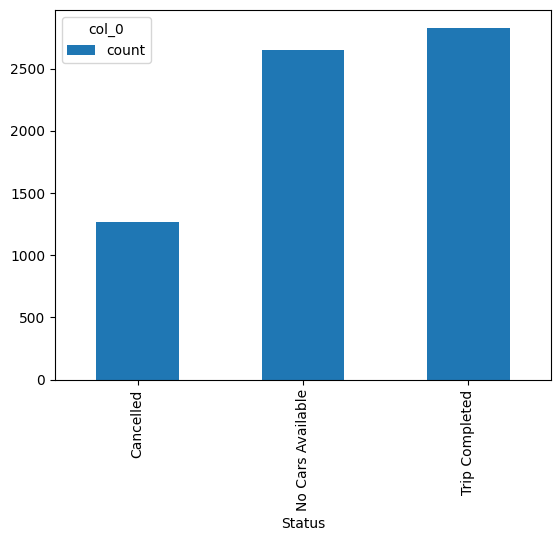

In [275]:
status  = pd.crosstab(index = data["Status"], columns = "count")
status.plot.bar()

<AxesSubplot: xlabel='Pickup point'>

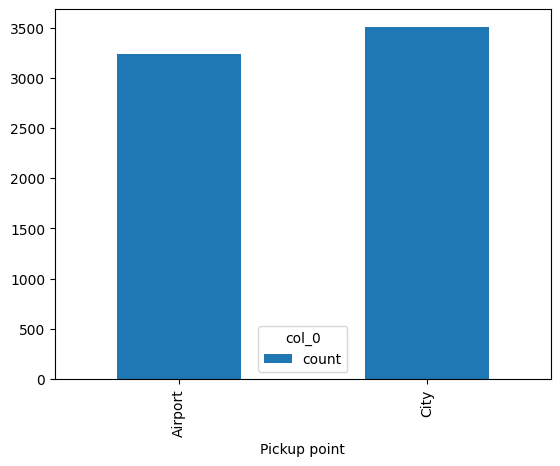

In [276]:
pick_point = pd.crosstab(index=data["Pickup point"] , columns= "count")
pick_point.plot.bar()

Univariate Analysis conclusion of Pickup point column:
The pickup points Airport and City are almost equal times present in the dataset.

Bivariate analysis

In [277]:
data.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot: xlabel='Pickup point', ylabel='count'>

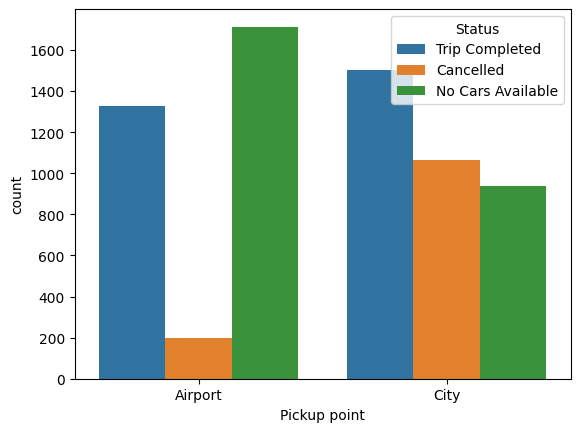

In [278]:
sns.countplot(x = data['Pickup point'],hue = data['Status'], data = data)

Bivariate Analysis conclusion of Status and Pickup point columns:

1.There are more No cars available from Airport to City.

2.There are more cars Cancelled from City to Airport.

Deriving new Metrics

In [279]:
data['Request Hour'] = data['Request timestamp'].dt.hour

In [280]:
#time slots
data['Request Time Slot'] = 'Early Morning'
data.loc[data['Request Hour'].between(5,8,inclusive=True),'Request Time Slot'] = 'Morning'
data.loc[data['Request Hour'].between(9,12,inclusive=True),'Request Time Slot'] = 'Late Morning'
data.loc[data['Request Hour'].between(13,16,inclusive=True),'Request Time Slot'] = 'Noon'
data.loc[data['Request Hour'].between(17,21,inclusive=True),'Request Time Slot'] = 'Evening'
data.loc[data['Request Hour'].between(21,24,inclusive=True),'Request Time Slot'] = 'Night'

In [281]:
#demand can include trips completed, cancelled or no cars avaible, we will create a column with 1 as value
data['Demand'] = 1 

In [282]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
data['Supply'] = 0
data.loc[(data['Status'] == 'Trip Completed'),'Supply'] = 1

In [283]:
#Demand Supply Gap can be defined as a difference between Demand and Supply
data['Gap'] = data['Demand'] - data['Supply']
data.loc[data['Gap'] == 0,'Gap'] = 'Trip Completed'
data.loc[data['Gap'] == 1,'Gap'] = 'Trip Not Completed'

In [284]:
data = data.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

In [285]:
data.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Morning,Trip Completed


Graphical Analysis:


<AxesSubplot: xlabel='Request Time Slot', ylabel='count'>

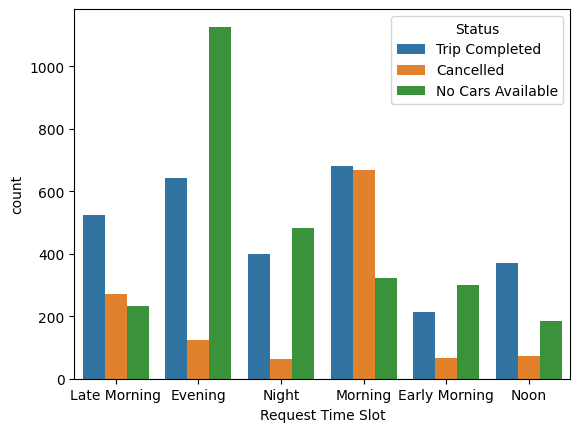

In [286]:
# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=data['Request Time Slot'],hue =data['Status'] ,data = data)

Conclusions from above plot :

Most No Cars Available are in the Evening.

Most Cancelled trips are in the Morning.

<AxesSubplot: xlabel='Pickup point,Request Time Slot'>

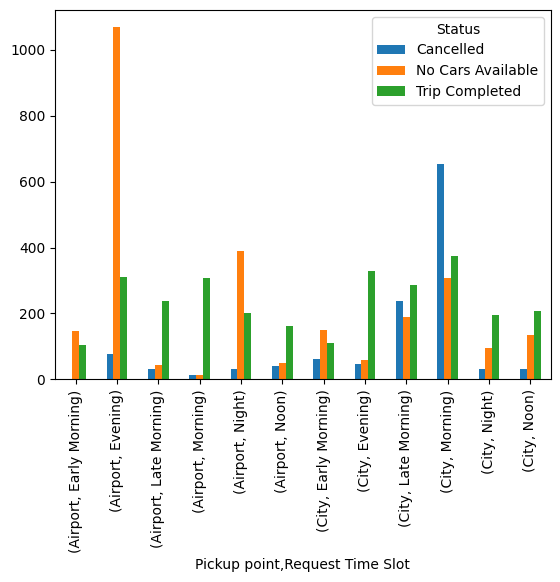

In [287]:
# Plot to find the count of the status, according to both pickup point and the time slot
pickup_df = pd.DataFrame(data.groupby(['Pickup point','Request Time Slot','Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

Conclusions from above plot :

Most No Cars Available are in the Evening from Airport to City.

Most Cancelled trips are in the Morning from City to Airport.

<AxesSubplot: xlabel='Gap', ylabel='count'>

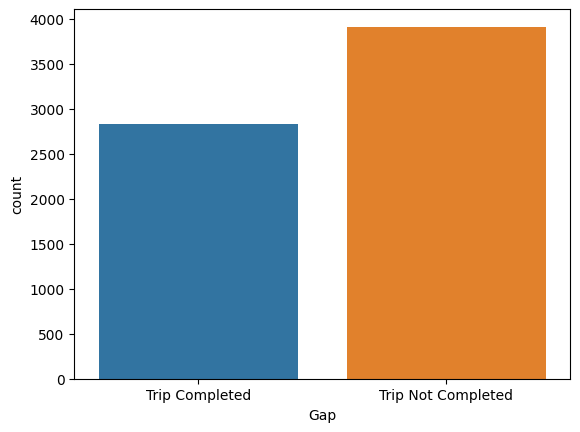

In [288]:
#Plot to count the number of requests that was completed and which was not
sns.countplot(x=data['Gap'], data = data)

Conclusions from above plot :

More Trip not completed than Trip Completed.

<AxesSubplot: xlabel='Request Time Slot'>

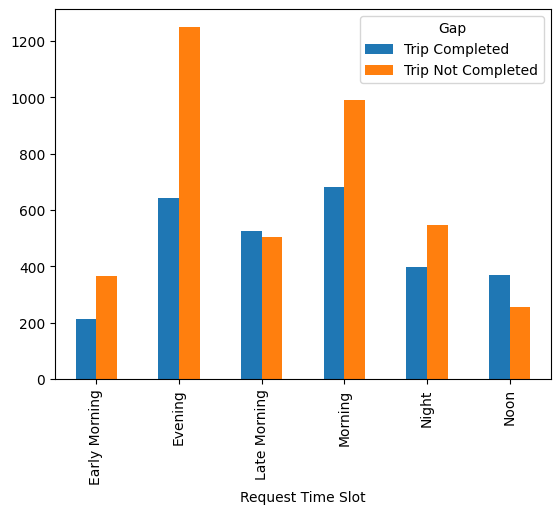

In [289]:
##Plot to count the number of requests that was completed and which was not, against the time slot
gap_timeslot_df = pd.DataFrame(data.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

<AxesSubplot: xlabel='Pickup point'>

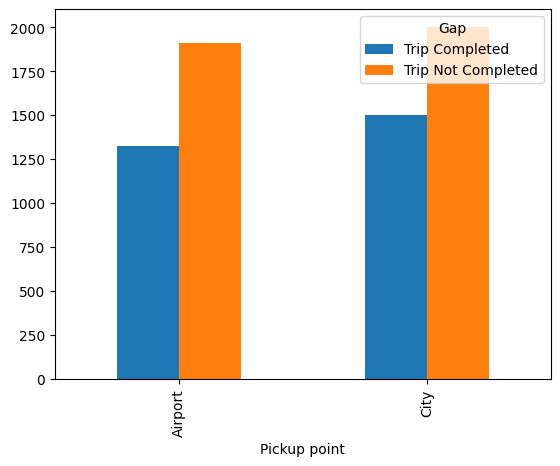

In [290]:
#Plot to count the number of requests that was completed and which was not, against pickup point
gap_pickup_df = pd.DataFrame(data.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

<AxesSubplot: xlabel='Request Time Slot,Pickup point'>

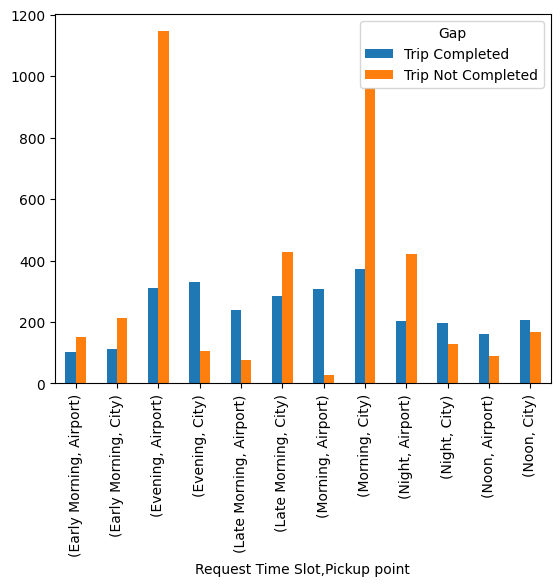

In [291]:
#Plot to count the number of requests that was completed and which was not, for the final analysis
gap_main_df = pd.DataFrame(data.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

Conclusions :
Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand: -

For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.

Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.

Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.